# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# So the plots display nicely in the notebook
%matplotlib inline
sns.set_style("whitegrid")

sys.path.append(os.path.abspath(".."))
from src.data_processing import *


## Dataset size and structure

In [ ]:
train_transaction, train_identity, test_transaction, test_identity = load_raw_data()

In [ ]:
df_train_merged = train_transaction.merge(train_identity, on="TransactionID", how="left")

### Shape
How many rows and columns does the dataset have?

In [ ]:
print("Train transaction shape: ", train_transaction.shape)
print("Train identity shape: ", train_identity.shape)

Train transaction shape:  (590540, 394)
Train identity shape:  (144233, 41)


In [6]:
print("Shape of the merged train set:", df_train_merged.shape)
print("\nColumns:\n", df_train_merged.columns)
df_train_merged.head()

Shape of the merged train set: (590540, 434)

Columns:
 Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


### Type of variables
What types of variables are present (categorical, numerical, dates, etc.)?

In [7]:
# Types of variables
df_train_merged.dtypes.value_counts()


float64    399
object      31
int64        4
Name: count, dtype: int64

## Distribution of key variables

### TransactionAmt
Analyze the distribution of TransactionAmt (transaction amount).

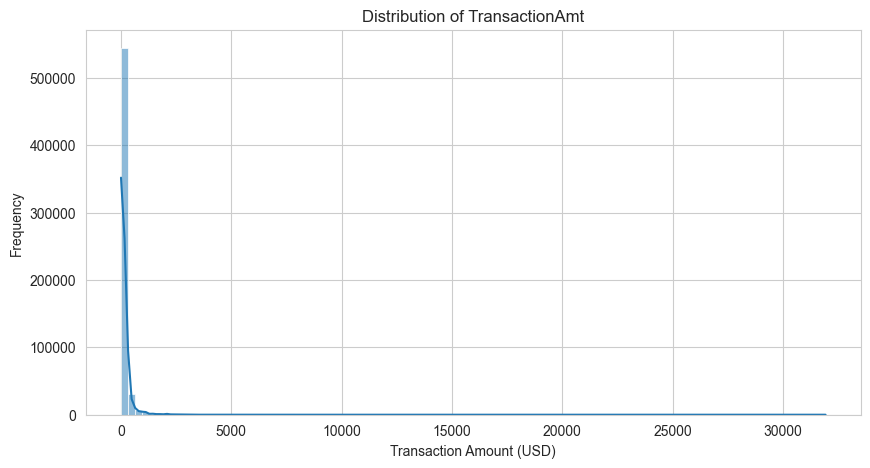

In [8]:
# Distribution of TransactionAmt
plt.figure(figsize=(10,5))
sns.histplot(df_train_merged["TransactionAmt"], bins=100, kde=True)
plt.title("Distribution of TransactionAmt")
plt.xlabel("Transaction Amount (USD)")
plt.ylabel("Frequency")
plt.show()


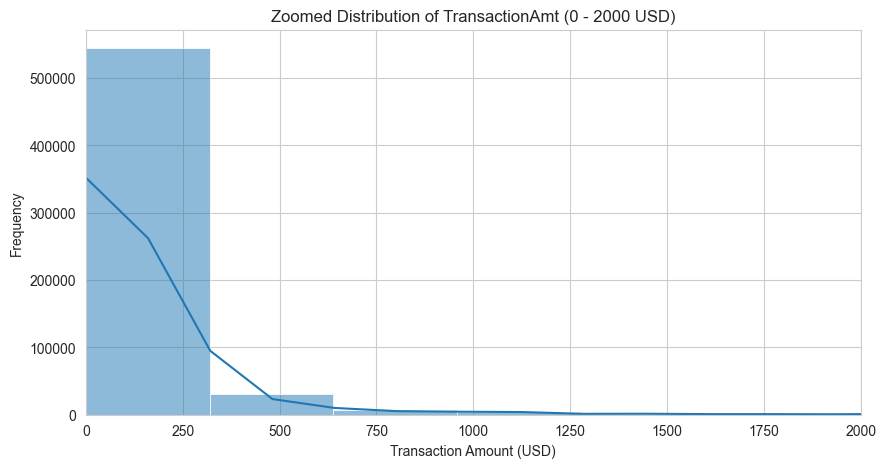

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df_train_merged["TransactionAmt"], bins=100, kde=True)
plt.xlim(0, 2000)
plt.title("Zoomed Distribution of TransactionAmt (0 - 2000 USD)")
plt.xlabel("Transaction Amount (USD)")
plt.ylabel("Frequency")
plt.show()


### card4
Check the frequency of each category in card4 (card type: Visa, Mastercard, etc.).

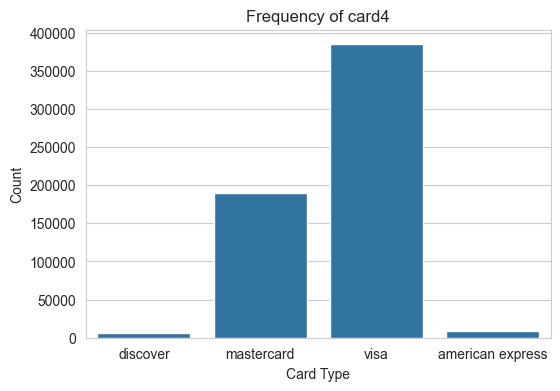

Unique card4 types: ['discover' 'mastercard' 'visa' 'american express' nan]


In [10]:
# card4 Frequency
plt.figure(figsize=(6,4))
sns.countplot(x="card4", data=df_train_merged)
plt.title("Frequency of card4")
plt.xlabel("Card Type")
plt.ylabel("Count")
plt.show()

# Check unique values in card4
print("Unique card4 types:", df_train_merged["card4"].unique())


### ProductCD
Observe the ProductCD variable: how many types of products are there and how are they distributed?

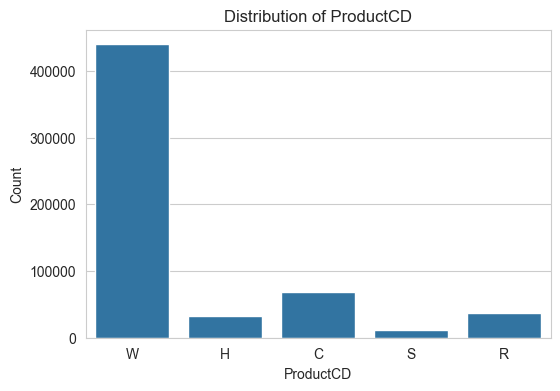

Unique ProductCD types: ['W' 'H' 'C' 'S' 'R']


In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="ProductCD", data=df_train_merged)
plt.title("Distribution of ProductCD")
plt.xlabel("ProductCD")
plt.ylabel("Count")
plt.show()

# Check unique values in ProductCD
print("Unique ProductCD types:", df_train_merged["ProductCD"].unique())

### isFraud

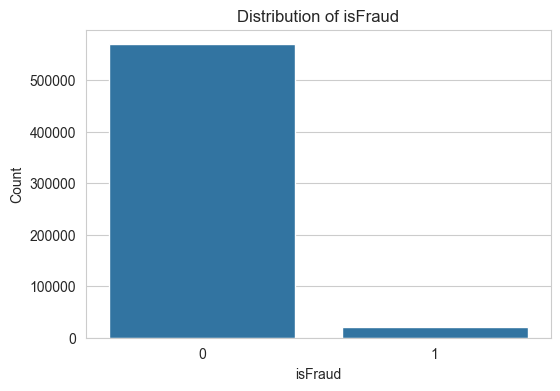

In [12]:
# We should check if the data is balanced
plt.figure(figsize=(6,4))
sns.countplot(x="isFraud", data=df_train_merged)
plt.title("Distribution of isFraud")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.show()

## Missing Values

### Column with most missing values

Which columns have the most missing values?

In [ ]:
# in train_transaction only
missing_counts = train_transaction.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_counts / len(train_transaction)) * 100
missing_df = pd.DataFrame({
    "MissingCount": missing_counts,
    "MissingPercentage": missing_percentage
})

print("Columns with the highest missing values in train_transaction:\n", 
      missing_df.head(10))


Columns with the highest missing values in train_transaction:
        MissingCount  MissingPercentage
dist2        552913          93.628374
D7           551623          93.409930
D13          528588          89.509263
D14          528353          89.469469
D12          525823          89.041047
D6           517353          87.606767
D9           515614          87.312290
D8           515614          87.312290
V153         508595          86.123717
V149         508595          86.123717


In [14]:
# columns have the most missing values
missing_counts = df_train_merged.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_counts / len(df_train_merged)) * 100
missing_df = pd.DataFrame({
    "MissingCount": missing_counts,
    "MissingPercentage": missing_percentage
})

print("Columns with the highest missing values:\n", 
      missing_df.head(10))


Columns with the highest missing values:
        MissingCount  MissingPercentage
id_24        585793          99.196159
id_25        585408          99.130965
id_07        585385          99.127070
id_08        585385          99.127070
id_21        585381          99.126393
id_26        585377          99.125715
id_27        585371          99.124699
id_23        585371          99.124699
id_22        585371          99.124699
dist2        552913          93.628374


### Handling missing values 
How would you handle missing values for numerical and categorical variables?

Our analysis showed that many features have very high missing percentages. For example, in the merged dataset, some identity fields (e.g., `id_24`, `id_25`) have over 99% missing values, while in the transaction-only data, certain time-delta features (e.g., `D7`, `D13`) have missing rates from 87% to 93%.

#### Strategies for Numerical Variables:
- **Low Missingness (<20%):**  
  Impute using the **median** (or mean) since these features are likely to have a balanced distribution.
  
- **High Missingness (>70-80%):**  
  - **Drop the Feature:** If a feature has very high missing values and isn’t expected to contribute much, consider dropping it.
  - **Missing Indicator:** Alternatively, create a binary flag (e.g., `D7_missing`) indicating if the value is missing, then impute the missing values (often using the median).  
  - **Domain Consideration:** Sometimes high missingness is inherent to the data collection process (e.g., not all transactions have identity information). In such cases, the missingness itself may be informative.

#### Strategies for Categorical Variables:
- **Impute with a New Category:**  
  For categorical fields (like `P_emaildomain` or `card4`), replacing missing values with a category such as `"Unknown"` is often effective.
- **Mode Imputation:**  
  If a particular category is dominant, you might also consider using the mode, but this should be guided by the context of the data.


## Outliers

### TransactionAmt
Identify possible outliers in TransactionAmt.

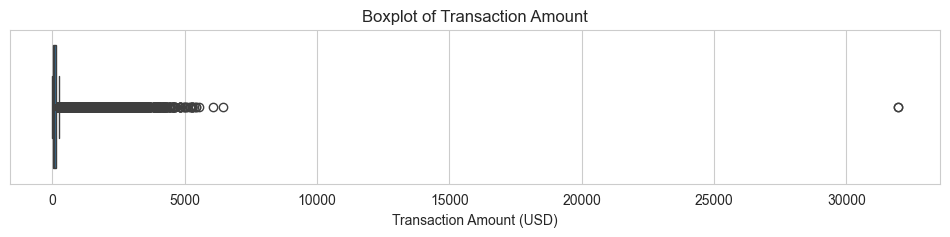

In [15]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=df_train_merged["TransactionAmt"])
plt.title("Boxplot of Transaction Amount")
plt.xlabel("Transaction Amount (USD)")
plt.show()


## Correlations

### Numerical values vs TransactionAmt

Calculate the correlations between the numerical variables C1, C2,
..., C14, D1, D2, ... and the transaction amount (TransactionAmt).

/var/folders/8c/3n532t214sl7q0wy9wf_qks00000gn/T/ipykernel_26624/2791430678.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_amt.values, y=corr_with_amt.index, palette="coolwarm", orient='h')


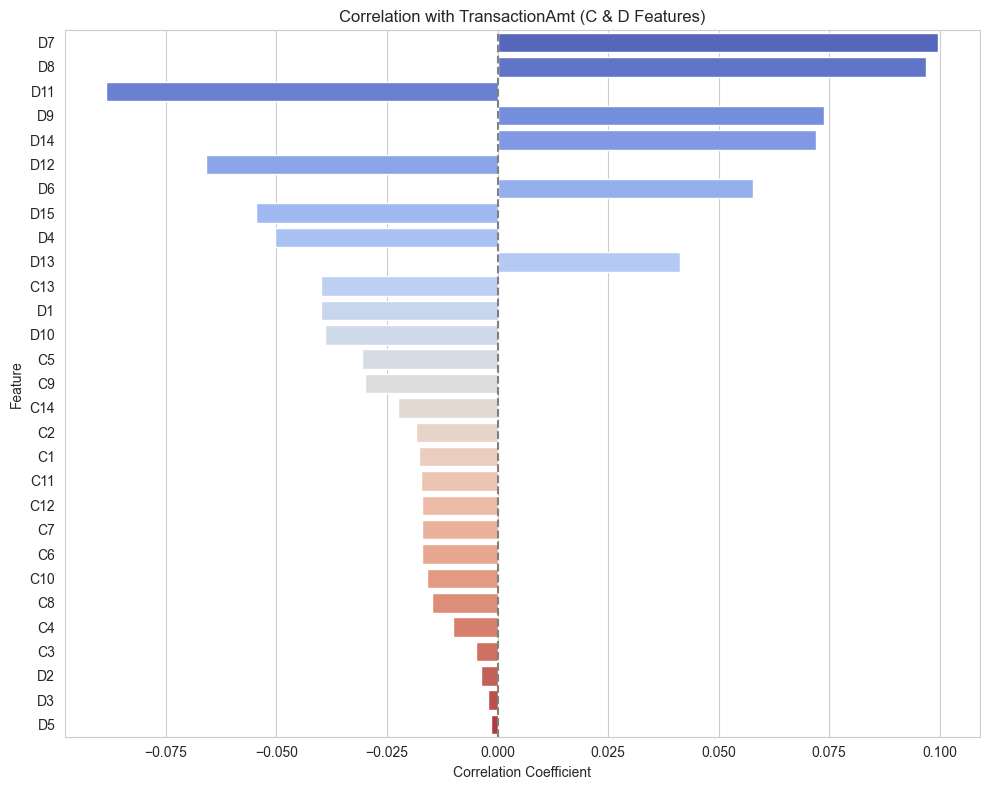

In [16]:
# Keep only numeric columns
numeric_df = df_train_merged.select_dtypes(include=[np.number])

# We'll pick some numeric columns that are presumably in the dataset
# For example, C1 - C14, D1 - D15, etc. Adjust if your data has more/less
num_cols = ["TransactionAmt"] + [col for col in numeric_df.columns if col.startswith("C")] + \
           [col for col in numeric_df.columns if col.startswith("D")]

# Filter the columns that actually exist
num_cols = [col for col in num_cols if col in df_train_merged.columns]

corr_matrix = df_train_merged[num_cols].corr()
# 4. Extract only correlation with TransactionAmt
corr_with_amt = corr_matrix["TransactionAmt"].drop("TransactionAmt").sort_values(key=abs, ascending=False)

# 5. Plot as horizontal bar chart (clearer than full heatmap)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_amt.values, y=corr_with_amt.index, palette="coolwarm", orient='h')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Correlation with TransactionAmt (C & D Features)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Significant correlations

What do you notice? Are there significant correlations?

We analyzed the correlation between `TransactionAmt` and a set of engineered numerical features starting with `C` and `D`, which represent count-based and time-delta-based values respectively.

- Overall, the correlations are **relatively weak** (ranging between -0.08 and +0.10), indicating that no single feature linearly explains `TransactionAmt` very strongly. This is expected in fraud detection tasks, where patterns are often non-linear or hidden in combinations of features.

- The most **positively correlated features** with `TransactionAmt` are:
  - **Time-delta features:**
    - `D7`, `D8`, `D9`, `D14` and etc: These features likely represent time gaps between events (e.g., previous activity, billing updates, etc.). Higher transaction amounts may be associated with **longer delays** or verification processes.
    - `D6`, `D13` and etc: Additional time-delta features also showing a mild positive trend with transaction size.

- The most **negatively correlated features** include:
  - **Count-based features:**
    - `C13`, `C2`, `C5`, `C9`, `C14` and etc: These may represent counts (such as the number of addresses, devices, or emails associated with a transaction). A weak negative correlation here suggests that lower transaction amounts are more common when there is frequent reuse of these entities.
  - **Time-delta features:**
    - `D11`, `D12`, `D15`, `D4`, `D1`, `D10` and etc: These features show a slight negative correlation, possibly indicating that smaller transactions tend to occur when events happen in quick succession.


**Conclusion:**

While no individual feature shows a strong linear relationship with `TransactionAmt`, several time-based and behavioral features hint at meaningful patterns. This supports the idea that **complex, non-linear models** (e.g., tree-based algorithms) and **feature combinations** will likely be more effective than linear models alone.

In [17]:
df_train_merged["TransactionDT"]

0            86400
1            86401
2            86469
3            86499
4            86506
            ...   
590535    15811047
590536    15811049
590537    15811079
590538    15811088
590539    15811131
Name: TransactionDT, Length: 590540, dtype: int64

In [18]:
df_train_merged

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
